#### Import all modules:
- **preprocess:** includes utility functions such as contrast stretching, image type conversion, and water index computation  
- **singularity_index:** extracts curvilinear structures  
- **delineate:** delineate rivers and estimate their widths  
- **georef:** loads and saves georeferenced files  
- **visualization:** includes visualization functions  

In [1]:
from src.identifiers.river import River
river = River("gis-raw/LC08_L1TP_014035_20231003_20231003_02_RT_B3.TIF", "gis-raw/LC08_L1TP_014035_20231003_20231003_02_RT_B6.TIF")

Compute the modified normalized difference water index
Create the filters that are needed to compute the multiscale singularity index
Apply the index to extract curvilinear structures from the input image
Extract and threshold centerlines to delineate rivers
Generate a map of the extracted channels
Create a quiver plot showing the magnitude and direction of channels
Save the results as georeferenced files


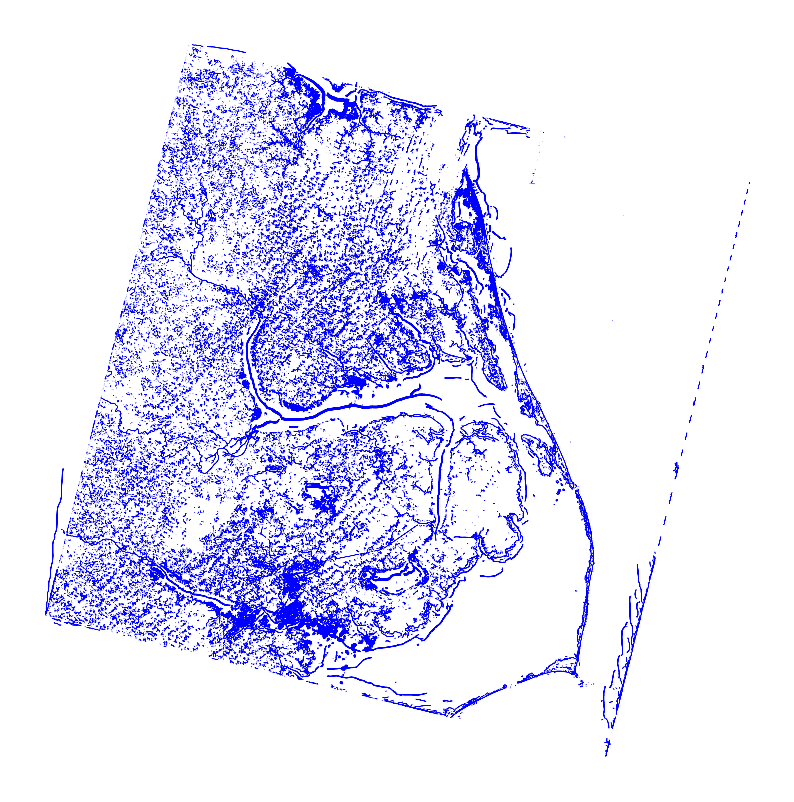

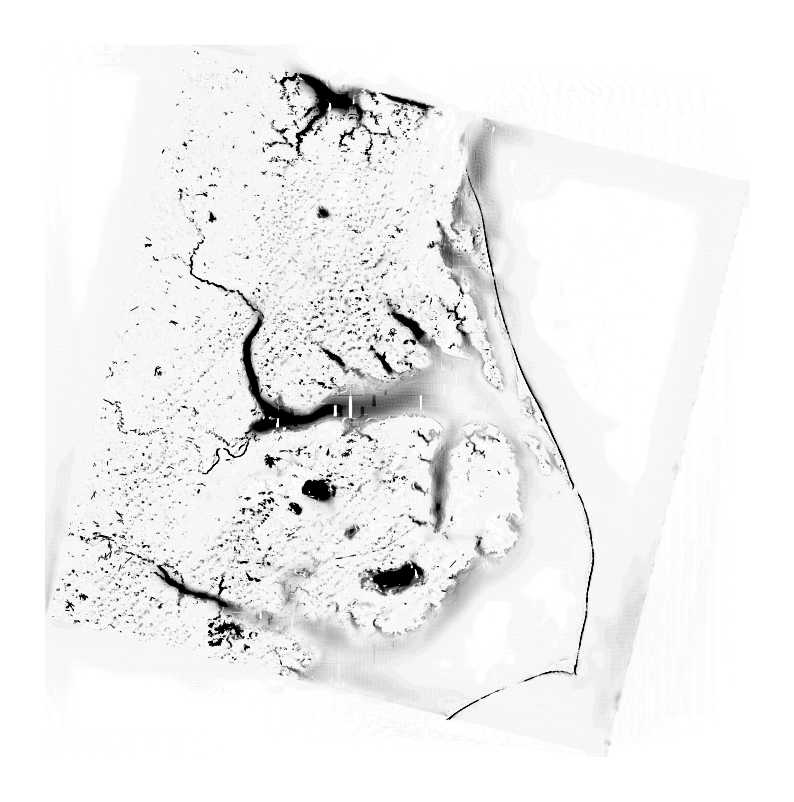

In [2]:
river.compute()

In [3]:
from osgeo import gdal
import matplotlib.pyplot as plt
file_path =  "gis-converted/LC08_L1TP_014035_20231003_20231003_02_RT_raster_geotagged.TIF"

In [4]:
# Open the GeoTIFF file using GDAL
dataset = gdal.Open(file_path, gdal.GA_ReadOnly)

# Read the image data as a NumPy array
image = dataset.ReadAsArray()

# Get the image dimensions (rows and columns)
rows, cols = image.shape

# Get the geospatial information from the GeoTIFF
geotransform = dataset.GetGeoTransform()

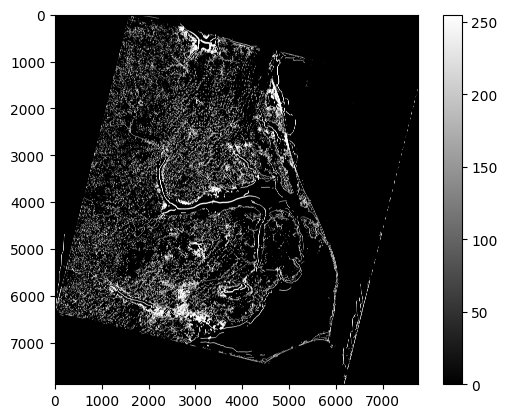

In [5]:
# Display the image using matplotlib
plt.imshow(image, cmap='gray')  # You can specify a colormap ('gray' is for grayscale)

# Add a colorbar to the image (if needed)
plt.colorbar()

# Set the aspect ratio to be equal, which is important for geospatial data
plt.gca().set_aspect('equal')

# Show the plot in the Jupyter Notebook
plt.show()


In [9]:
import geopandas as gpd

shapefile_path = "./vis/LC08_L1TP_014035_20231003_20231003_02_RT_results.shp"

gdf = gpd.read_file(shapefile_path)


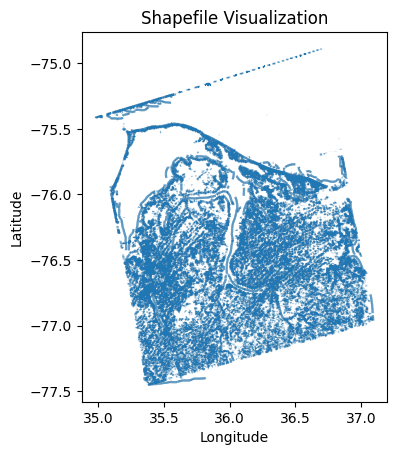

In [10]:
# Plot the shapefile
gdf.plot()

# Customize the plot (e.g., add title, labels, etc.)
plt.title('Shapefile Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot in the Jupyter Notebook
plt.show()
